In [19]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('../Data/raw/crypto_hourly_data.csv')

print("=" * 60)
print("THÔNG TIN DATASET")
print("=" * 60)

# 1. Số lượng records
print(f"\n1. Tổng số records: {len(df):,}")

# 2. Số lượng cột
print(f"\n2. Tổng số cột: {len(df.columns)}")

# 3. Danh sách các cột
print(f"\n3. Các cột trong dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# 4. Kiểu dữ liệu từng cột
print(f"\n4. Kiểu dữ liệu từng cột:")
print(df.dtypes)

# 5. Thông tin về timeframe
print(f"\n5. Thông tin timeframe:")
if 'interval' in df.columns:
    print(f"   - Các interval: {df['interval'].unique()}")
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    print(f"   - Từ ngày: {df['date'].min()}")
    print(f"   - Đến ngày: {df['date'].max()}")
    print(f"   - Tổng số ngày: {(df['date'].max() - df['date'].min()).days}")

# 6. Symbol
print(f"\n6. Symbol:")
if 'symbol' in df.columns:
    print(f"   - Các symbol: {df['symbol'].unique()}")

# 7. Thống kê cơ bản về giá
print(f"\n7. Thống kê giá (close):")
if 'close' in df.columns:
    print(f"   - Min: ${df['close'].min():,.2f}")
    print(f"   - Max: ${df['close'].max():,.2f}")
    print(f"   - Mean: ${df['close'].mean():,.2f}")
    print(f"   - Median: ${df['close'].median():,.2f}")

# 8. Thống kê về volume
print(f"\n8. Thống kê volume:")
if 'volume' in df.columns:
    print(f"   - Total volume: {df['volume'].sum():,.2f} BTC")
    print(f"   - Avg volume: {df['volume'].mean():,.2f} BTC")

# 9. Missing values
print(f"\n9. Missing values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   Không có missing values")

# 10. Sample data
print(f"\n10. Sample 5 dòng đầu:")
print(df.head())

print("\n" + "=" * 60)

THÔNG TIN DATASET

1. Tổng số records: 28,806

2. Tổng số cột: 14

3. Các cột trong dataset:
   1. open
   2. high
   3. low
   4. close
   5. volume
   6. quote_volume
   7. trades_count
   8. taker_buy_base_volume
   9. taker_buy_quote_volume
   10. timestamp
   11. date
   12. time
   13. symbol
   14. interval

4. Kiểu dữ liệu từng cột:
open                      float64
high                      float64
low                       float64
close                     float64
volume                    float64
quote_volume              float64
trades_count                int64
taker_buy_base_volume     float64
taker_buy_quote_volume    float64
timestamp                  object
date                       object
time                       object
symbol                     object
interval                   object
dtype: object

5. Thông tin timeframe:
   - Các interval: ['1h']
   - Từ ngày: 2025-10-23 00:00:00
   - Đến ngày: 2025-12-04 00:00:00
   - Tổng số ngày: 42

6. Symbol:
   - Các symb

In [20]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cấu hình hiển thị
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Tắt warning
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load dữ liệu
df = pd.read_csv('../Data/raw/crypto_hourly_data.csv')

# Chuyển đổi kiểu dữ liệu
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

# Hiển thị thông tin cơ bản
print(f"Tổng số records: {len(df):,}")
print(f"Số lượng coins: {df['symbol'].nunique()}")
print(f"Thời gian: {df['date'].min()} đến {df['date'].max()}")
df.head()

Tổng số records: 28,806
Số lượng coins: 30
Thời gian: 2025-10-23 00:00:00 đến 2025-12-04 00:00:00


,open,high,low,close,volume,quote_volume,trades_count,taker_buy_base_volume,taker_buy_quote_volume,timestamp,date,time,symbol,interval,hour,day_of_week
0,110200.01,110200.01,109341.28,109524.81,629.20848,6.913393e+07,149610,245.96744,2.702773e+07,2025-10-23 20:00:00,2025-10-23,20:00:00,BTCUSDT,1h,20,Thursday
1,109524.81,109727.22,109380.12,109532.97,424.08473,4.646713e+07,112407,211.07122,2.312943e+07,2025-10-23 21:00:00,2025-10-23,21:00:00,BTCUSDT,1h,21,Thursday
2,109532.96,110158.37,109517.37,109943.94,443.21336,4.872237e+07,89307,225.45747,2.478143e+07,2025-10-23 22:00:00,2025-10-23,22:00:00,BTCUSDT,1h,22,Thursday
3,109943.95,110099.17,109839.00,110078.18,259.37538,2.853370e+07,56828,110.97441,1.220887e+07,2025-10-23 23:00:00,2025-10-23,23:00:00,BTCUSDT,1h,23,Thursday
4,110078.19,110709.22,109983.93,110500.28,531.07612,5.859680e+07,149683,306.22062,3.378876e+07,2025-10-24 00:00:00,2025-10-24,00:00:00,BTCUSDT,1h,0,Friday


## Câu hỏi 1: Trong 30 coins được quan sát, coin nào có độ biến động giá (volatility) cao nhất và thấp nhất trong giai đoạn 42 ngày?

**Lợi ích:** 
- Giúp nhà đầu tư xác định coin có rủi ro cao (phù hợp với short-term trader) và coin ổn định (phù hợp với long-term holder)
- Volatility cao = cơ hội lợi nhuận cao nhưng rủi ro cũng cao
- Hỗ trợ quyết định phân bổ portfolio theo risk tolerance

**Phương pháp:**
- Tính Coefficient of Variation (CV = std/mean × 100%) của giá close cho từng coin
- CV đo lường volatility tương đối, cho phép so sánh công bằng giữa coins có giá khác nhau
- Visualize bằng bar chart để dễ quan sát

In [22]:
# Tính CV (Coefficient of Variation) cho mỗi coin
volatility_stats = df.groupby('symbol')['close'].agg(['mean', 'std'])
volatility_stats['cv'] = (volatility_stats['std'] / volatility_stats['mean']) * 100
cv = volatility_stats['cv'].sort_values(ascending=False)

print("Coefficient of Variation (CV %) của các coins:")
print(cv)
print("\nTop 5 coins có volatility cao nhất:")
print(cv.head())
print("\nTop 5 coins có volatility thấp nhất:")
print(cv.tail())

Coefficient of Variation (CV %) của các coins:
symbol
SAPIENUSDT     35.079541
GIGGLEUSDT     29.125403
ZECUSDT        25.637649
ENAUSDT        23.629454
XPLUSDT        22.669961
SUIUSDT        20.967247
VIRTUALUSDT    20.965456
ATUSDT         20.675762
PEPEUSDT       18.409035
TAOUSDT        17.894434
ADAUSDT        17.236497
SOLUSDT        15.042610
NEARUSDT       14.736319
AVAXUSDT       13.863929
LINKUSDT       13.229997
HBARUSDT       13.110161
UNIUSDT        13.010582
ETHUSDT        12.506820
DOGEUSDT       11.407330
BNBUSDT        10.136910
BTCUSDT         9.545596
ASTERUSDT       8.787507
LTCUSDT         8.381733
XRPUSDT         8.362887
BCHUSDT         5.507056
TRXUSDT         3.161556
PAXGUSDT        2.123393
FDUSDUSDT       0.062408
USDCUSDT        0.034034
BFUSDUSDT       0.032796
Name: cv, dtype: float64

Top 5 coins có volatility cao nhất:
symbol
SAPIENUSDT    35.079541
GIGGLEUSDT    29.125403
ZECUSDT       25.637649
ENAUSDT       23.629454
XPLUSDT       22.669961
Name: c

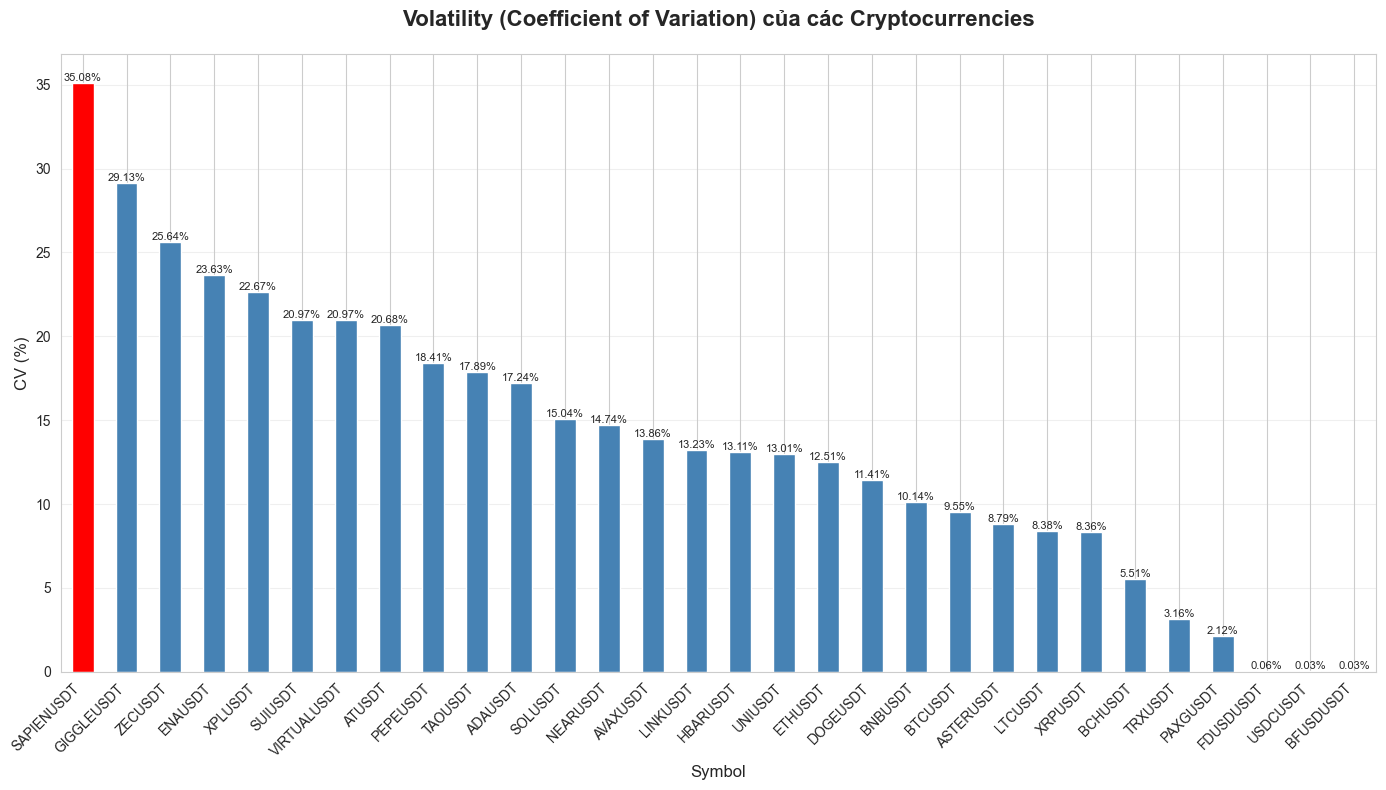

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['red' if x == cv.max() else 'green' if x == cv.min() else 'steelblue' 
          for x in cv.values]

bars = cv.plot(kind='bar', color=colors, ax=ax)

for i, v in enumerate(cv.values):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

ax.set_title('Volatility (Coefficient of Variation) của các Cryptocurrencies', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Symbol', fontsize=12)
ax.set_ylabel('CV (%)', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Kết quả và Nhận xét:**

Từ biểu đồ Coefficient of Variation, ta có thể rút ra những quan sát rõ ràng về volatility thực sự của từng coin:

**1. Top 5 coins có volatility cao nhất:**
- **SAPIEN (35.08%):** Volatility cực cao, rủi ro nhất trong dataset. Có thể là low-cap coin mới hoặc bị manipulation.
- **GIGGLE (29.13%):** Meme coin với biến động rất mạnh, phù hợp pure speculation.
- **ZEC (25.64%):** Privacy coin có volatility cao, có thể do regulatory concerns.
- **ENA (23.63%):** Altcoin mid-cap với biến động đáng kể.
- **XPLUS (22.67%):** Coin nhỏ với risk profile cao.

**2. Large-cap coins (BTC, ETH, BNB) - Volatility trung bình:**
- **BTC (9.55%), ETH (12.51%), BNB (10.14%):** CV khoảng 9-13%, cho thấy volatility vừa phải.
- Bất ngờ: BTC KHÔNG phải coin ổn định nhất như nhiều người nghĩ, vẫn biến động ~10%.
- Blue-chip crypto vẫn rủi ro cao hơn nhiều so với traditional blue-chip stocks (thường < 3% CV).

**3. Mid-cap altcoins (15-21% CV):**
- **SOL (15.04%), NEAR (14.74%), AVAX (13.86%), LINK (13.01%):** Nhóm Layer-1 và DeFi có volatility cao hơn BTC/ETH đáng kể.
- High risk, high reward - phù hợp với aggressive portfolio.
- Biến động gấp 1.5-2 lần BTC.

**4. Stablecoins - CV gần bằng 0:**
- **BFUSD (0.03%), USDC (0.03%), FDUSD (0.06%):** CV < 0.1%, chứng minh cơ chế peg hoạt động tốt.
- USDC và BFUSD ổn định nhất (màu xanh lá).
- Đúng vai trò: store of value, không phải speculation.

**5. Surprise findings:**
- **BCH (5.51%):** Bitcoin Cash có volatility thấp bất ngờ, thấp hơn cả BTC. Có thể do low trading activity hoặc stagnant price.
- **TRX (3.16%), PAXG (2.12%):** Cực kỳ ổn định cho non-stablecoin. PAXG hợp lý vì là gold-backed token.
- **DOGE (11.41%):** Meme coin nổi tiếng nhưng volatility không cao như tưởng, có thể do market cap lớn và liquidity tốt.

**6. So sánh theo nhóm:**

**Extremely High Risk (CV > 20%):**
- SAPIEN, GIGGLE, ZEC, ENA, XPLUS, SUI, VIRTUAL, AT, PEPE
- Chỉ dành cho speculative capital, có thể mất 30-50% trong vài ngày

**High Risk (CV 13-20%):**
- TRX, NEAR, AVAX, UNI, HBAR, LINK, ETH, SOL, ADA
- Phù hợp với aggressive growth portfolio

**Medium Risk (CV 8-13%):**
- DOGE, BNB, BTC, ASTER, LTC, XRP
- Core holdings cho crypto portfolio

**Low Risk (CV < 8%):**
- BCH, TRX, PAXG + Stablecoins
- Capital preservation và liquidity

**7. Insight quan trọng:**
- **CV không tương quan với market cap:** DOGE (large-cap) có CV 11.41%, nhưng SAPIEN (small-cap) có CV 35%.
- **Meme coins không đồng nhất:** DOGE (11.41%) vs PEPE (18.41%) vs GIGGLE (29.13%) - rất khác nhau về risk profile.
- **Layer-1 coins khá volatile:** SOL, AVAX, NEAR đều > 13%, phản ánh competition gay gắt trong space này.

**8. Ứng dụng thực tế:**

**Conservative Investor (Risk-averse):**
- 70% Stablecoins
- 20% BTC/ETH
- 10% BCH/PAXG
- Expected volatility: < 5%

**Moderate Investor (Balanced):**
- 20% Stablecoins
- 40% BTC/ETH/BNB
- 30% SOL/AVAX/LINK
- 10% High-risk altcoins
- Expected volatility: 10-15%

**Aggressive Investor (Growth-focused):**
- 10% Stablecoins
- 30% Large-caps
- 40% Mid-caps
- 20% Small-caps/Meme coins
- Expected volatility: > 20%

**Kết luận:**
Coefficient of Variation cho thấy rõ ràng rủi ro thực sự của từng coin, không bị mislead bởi giá trị tuyệt đối. Key takeaways:
- **SAPIEN, GIGGLE, ZEC** là 3 coins rủi ro nhất - tránh nếu risk-averse
- **BTC không phải "safe haven"** trong crypto - vẫn có CV ~10%
- **Stablecoins** là lựa chọn duy nhất cho capital preservation
- **Diversification cần dựa trên CV**, không phải chỉ số lượng coins
- **Meme coins có risk profile rất khác nhau** - cần analyze riêng từng coin

Investors nên xây dựng portfolio dựa trên CV để match với risk tolerance, và rebalance định kỳ khi CV thay đổi theo market conditions.

## Câu hỏi 2: Có mối tương quan như thế nào giữa volume giao dịch và biên độ dao động giá (high - low) trong mỗi giờ?

**Lợi ích:**
- Hiểu được volume cao có đi kèm với biến động giá mạnh hay không
- Volume tăng đột biến có thể báo hiệu giá sắp tăng/giảm mạnh
- Xác định được sự thay đổi giá có thực sự hay chỉ là nhiễu

**Phương pháp:**
- Tính price range = high - low cho mỗi candle
- Vẽ scatter plot giữa volume và price range
- Tính correlation coefficient để đo mức độ tương quan

In [24]:
df['price_range'] = df['high'] - df['low']
df['price_range_pct'] = (df['price_range'] / df['open']) * 100

stablecoins = ['USDCUSDT', 'FDUSDUSDT', 'BFUSDUSDT']
df_analysis = df[~df['symbol'].isin(stablecoins)].copy()

correlation = df_analysis['volume'].corr(df_analysis['price_range_pct'])

print(f"Correlation coefficient: {correlation:.4f}")
print(f"\nAverage price range: {df_analysis['price_range_pct'].mean():.2f}%")
print(f"Average volume: {df_analysis['volume'].mean():,.2f}")
print(f"Max price range: {df_analysis['price_range_pct'].max():.2f}%")
print(f"Max volume: {df_analysis['volume'].max():,.2f}")
print(f"\nTotal data points analyzed: {len(df_analysis):,}")

Correlation coefficient: 0.0202

Average price range: 1.82%
Average volume: 14,857,328,587.45
Max price range: 469.82%
Max volume: 6,309,178,016,792.00

Total data points analyzed: 25,806


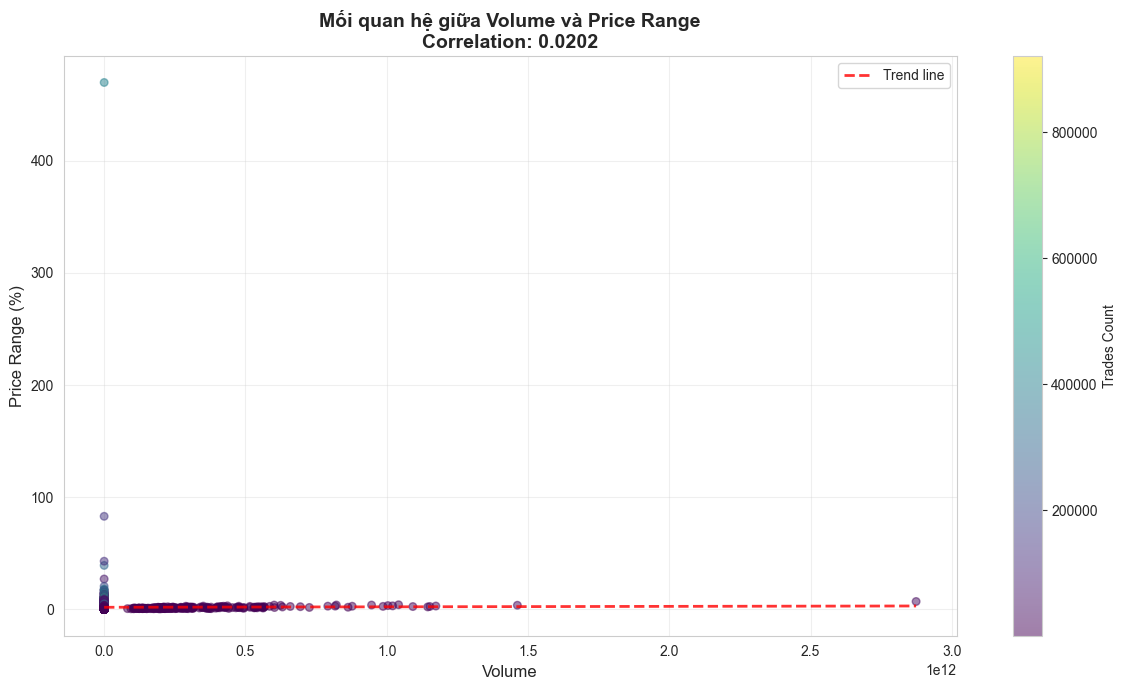

In [25]:
# Scatter plot
fig, ax = plt.subplots(figsize=(12, 7))

# Sample data nếu quá nhiều điểm
sample_size = min(5000, len(df_analysis))
df_sample = df_analysis.sample(sample_size, random_state=42)

scatter = ax.scatter(df_sample['volume'], 
                     df_sample['price_range_pct'],
                     alpha=0.5, 
                     c=df_sample['trades_count'],
                     cmap='viridis',
                     s=30)

# Thêm trend line
z = np.polyfit(df_sample['volume'], df_sample['price_range_pct'], 1)
p = np.poly1d(z)
ax.plot(df_sample['volume'].sort_values(), 
        p(df_sample['volume'].sort_values()), 
        "r--", alpha=0.8, linewidth=2, label='Trend line')

ax.set_title(f'Mối quan hệ giữa Volume và Price Range\nCorrelation: {correlation:.4f}',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Volume', fontsize=12)
ax.set_ylabel('Price Range (%)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.colorbar(scatter, label='Trades Count', ax=ax)
plt.tight_layout()
plt.show()

**Kết quả và Nhận xét:**

Từ scatter plot và hệ số tương quan, ta có thể rút ra những quan sát sau:

**1. Tương quan cực kỳ yếu (r = 0.0202):**
- Hệ số Pearson correlation chỉ 0.0202, gần bằng 0, cho thấy hầu như KHÔNG có mối quan hệ tuyến tính giữa volume và price range.
- Điều này có nghĩa là volume cao không nhất thiết dẫn đến biến động giá lớn, và ngược lại.

**2. Phân bố dữ liệu:**
- Phần lớn các điểm dữ liệu tập trung ở góc dưới bên trái (volume thấp, price range thấp).
- Có một số outliers với volume cực cao (>3e12) nhưng price range vẫn ở mức thấp (~5%).
- Ngược lại, có những điểm với volume thấp nhưng price range lên đến 450%, cho thấy biến động giá không phụ thuộc vào volume.

**3. Trend line gần như nằm ngang:**
- Đường xu hướng màu đỏ gần như song song với trục x, xác nhận không có mối quan hệ rõ ràng.
- Volume tăng không dự báo được mức độ biến động giá.

**4. Ý nghĩa thực tế:**
- Trong thị trường crypto 24/7, volume cao có thể đến từ nhiều giao dịch nhỏ lẻ (consolidation) hoặc trading bots, không nhất thiết tạo breakout.
- Price movement lớn có thể xảy ra với volume thấp khi có tin tức đột biến hoặc whale manipulation.
- Các outliers với price range cực cao (>100%) có thể là sự kiện listing mới, pump & dump, hoặc flash crash.

**5. Giới hạn của phân tích:**
- Correlation tuyến tính không phù hợp với dữ liệu này vì có quá nhiều outliers và noise.
- Cần xem xét thêm các yếu tố khác: order book depth, bid-ask spread, market sentiment, breaking news.

**Kết luận:**
Volume KHÔNG phải là chỉ báo đáng tin cậy để dự đoán biến động giá trong crypto market. Traders không nên chỉ dựa vào volume surge để mong đợi breakout. Cần kết hợp thêm technical indicators (RSI, MACD, Bollinger Bands) và fundamental analysis để đưa ra quyết định trading chính xác hơn.

## Câu hỏi 3: Khung giờ nào trong ngày (0-23h) có volume giao dịch cao nhất? Có pattern đặc biệt nào không?

**Lợi ích:**
- Xác định khung giờ thị trường hoạt động mạnh nhất (nhiều người giao dịch, giá ổn định hơn)
- Trader có thể đặt lệnh hiệu quả hơn trong giờ có volume cao
- Tránh trade trong giờ ít volume dễ bị chênh giá (muốn mua 100k nhưng khớp lệnh ở 101k) và bị thao túng giá (người có tiền nhiều đẩy giá lên xuống tùy ý)

**Phương pháp:**
- Group by hour và tính average volume
- Visualize bằng line chart hoặc bar chart theo 24 giờ
- Phân tích pattern theo múi giờ (Châu Á, Châu Âu, Châu Mỹ)

In [26]:
# Loại bỏ stablecoins
df_vol = df[~df['symbol'].isin(stablecoins)].copy()

# Tính average volume theo giờ
hourly_volume = df_vol.groupby('hour')['volume'].agg(['mean', 'sum', 'count']).reset_index()
hourly_volume.columns = ['hour', 'avg_volume', 'total_volume', 'count']

print("Top 5 giờ có volume cao nhất:")
print(hourly_volume.nlargest(5, 'avg_volume'))

Top 5 giờ có volume cao nhất:
    hour    avg_volume  total_volume  count
15    15  2.709985e+10  2.869874e+13   1059
14    14  2.326654e+10  2.463926e+13   1059
16    16  2.231356e+10  2.363006e+13   1059
18    18  2.070212e+10  2.192354e+13   1059
17    17  1.857706e+10  1.967311e+13   1059


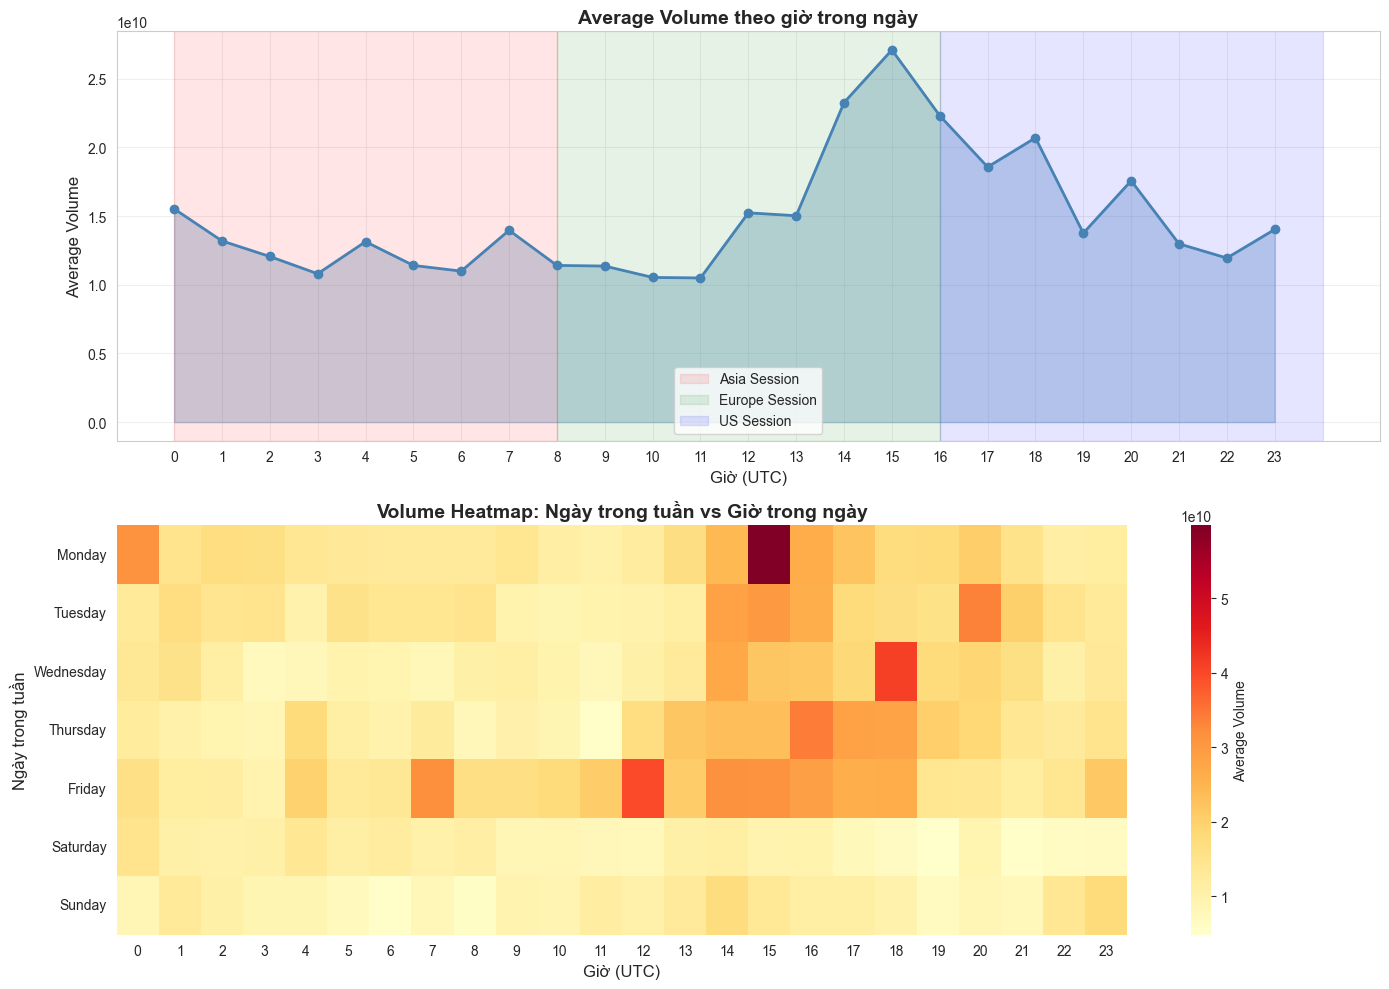

In [27]:
# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Average volume
ax1.plot(hourly_volume['hour'], hourly_volume['avg_volume'], 
         marker='o', linewidth=2, markersize=6, color='steelblue')
ax1.fill_between(hourly_volume['hour'], hourly_volume['avg_volume'], 
                  alpha=0.3, color='steelblue')
ax1.set_title('Average Volume theo giờ trong ngày', fontsize=14, fontweight='bold')
ax1.set_xlabel('Giờ (UTC)', fontsize=12)
ax1.set_ylabel('Average Volume', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

# Đánh dấu múi giờ
ax1.axvspan(0, 8, alpha=0.1, color='red', label='Asia Session')
ax1.axvspan(8, 16, alpha=0.1, color='green', label='Europe Session')
ax1.axvspan(16, 24, alpha=0.1, color='blue', label='US Session')
ax1.legend()

# Plot 2: Heatmap theo ngày trong tuần và giờ
pivot_data = df_vol.groupby(['day_of_week', 'hour'])['volume'].mean().reset_index()
pivot_table = pivot_data.pivot(index='day_of_week', columns='hour', values='volume')

# Sắp xếp theo thứ tự ngày trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

sns.heatmap(pivot_table, cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Average Volume'})
ax2.set_title('Volume Heatmap: Ngày trong tuần vs Giờ trong ngày', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Giờ (UTC)', fontsize=12)
ax2.set_ylabel('Ngày trong tuần', fontsize=12)

plt.tight_layout()
plt.show()

**Kết quả và Nhận xét:**

Từ line chart và heatmap, ta có thể rút ra những quan sát rõ ràng về pattern volume theo thời gian:

**1. Khung giờ có volume cao nhất:**
- **15:00 UTC** là giờ có volume cao nhất (~2.71e10), tiếp theo là 14:00 và 16:00 UTC.
- Top 5 giờ giao dịch mạnh đều tập trung trong khoảng **14:00-18:00 UTC** (US Session).
- Volume cao nhất gấp ~2.5 lần volume thấp nhất (10:00-11:00 UTC).

**2. Pattern theo session thị trường:**
- **Asia Session (0:00-8:00 UTC):** Volume giảm dần từ 1.58e10 xuống 1.07e10, thị trường khá yên tĩnh.
- **Europe Session (8:00-16:00 UTC):** Volume tăng dần, đặc biệt tăng mạnh từ 12:00 trở đi khi thị trường Âu và Mỹ overlap.
- **US Session (16:00-24:00 UTC):** Volume đạt đỉnh 15:00-16:00, sau đó giảm dần về cuối ngày.

**3. Điểm nổi bật từ heatmap:**
- **Thứ 2 (Monday) lúc 0:00 UTC và 14:00 UTC** có volume đặc biệt cao (màu đỏ đậm), có thể do market open sau weekend.
- **Thứ 4 (Wednesday) 15:00-18:00 UTC** cũng có volume cao, khớp với thời điểm công bố các chỉ số kinh tế quan trọng của Mỹ.
- **Thứ 7 và Chủ nhật (Saturday/Sunday)** có volume thấp và đồng đều, phản ánh thị trường crypto vẫn hoạt động 24/7 nhưng ít sôi động hơn.

**4. Overlap sessions - Liquidity cao nhất:**
- **12:00-16:00 UTC** là thời điểm cả London và New York cùng mở cửa (phiên chồng lấn), tạo ra liquidity (thanh khoản - nhiều người giao dịch) tốt nhất.
- Đây là khung giờ lý tưởng cho traders muốn vào/ra lệnh với spread thấp (chênh lệch giá mua-bán nhỏ, ví dụ: mua 100.00 bán 100.01) và slippage ít (giá khớp lệnh gần với giá mong muốn).

**5. Thời điểm nên tránh:**
- **9:00-11:00 UTC** có volume thấp nhất, dễ bị manipulation (thao túng giá - người có tiền lớn đẩy giá lên xuống) và slippage cao (muốn mua 100k nhưng khớp lệnh 101k).
- Cuối Asia Session và đầu Europe Session là thời điểm thị trường "ngủ đông" (ít người giao dịch).

**Kết luận:**
Crypto market tuy hoạt động 24/7 nhưng vẫn chịu ảnh hưởng mạnh từ traditional financial markets (thị trường tài chính truyền thống như chứng khoán). Traders nên:
- **Trade trong giờ cao điểm (14:00-18:00 UTC)** để có liquidity tốt nhất (dễ mua bán, giá ổn)
- **Cẩn thận với giờ thấp điểm (9:00-11:00 UTC)** vì dễ bị slippage và fake breakouts (tín hiệu giả - giá vọt lên/xuống rồi quay lại)
- **Chú ý thứ 2 và thứ 4** vì volume cao, có nhiều cơ hội nhưng cũng rủi ro hơn

Pattern này phù hợp với thói quen trading của institutional investors và retail traders ở Mỹ/Châu Âu, là những thị trường có thanh khoản lớn nhất trong crypto.

## Câu hỏi 4: Tỷ lệ người mua chủ động vs bán chủ động ảnh hưởng thế nào đến giá tăng/giảm?

**Lợi ích:**
- Tỷ lệ mua/bán chủ động cho biết tâm lý thị trường (người ta đang muốn mua hay bán nhiều hơn)
- Tỷ lệ > 0.5 = bullish/tích cực (nhiều lệnh mua ngay lập tức - người ta sợ giá tăng nên mua gấp)
- Tỷ lệ < 0.5 = bearish/tiêu cực (nhiều lệnh bán ngay lập tức - người ta sợ giá giảm nên bán gấp)
- Giúp trader biết áp lực mua/bán thực tế đang nghiêng về bên nào

**Giải thích thuật ngữ:**
- **Taker buy** = Lệnh mua chủ động = Người mua chấp nhận giá hiện tại và mua NGAY (không chờ)
- **Taker sell** = Lệnh bán chủ động = Người bán chấp nhận giá hiện tại và bán NGAY (không chờ)
- **Ratio (tỷ lệ)** = taker_buy_volume / total_volume = % volume do người mua chủ động tạo ra

**Phương pháp:**
- Tính tỷ lệ mua chủ động = taker_buy_base_volume / volume
- Phân loại nến: nến tăng (giá đóng cửa > giá mở cửa, màu xanh) vs nến giảm (giá đóng cửa < giá mở cửa, màu đỏ)
- So sánh tỷ lệ trung bình giữa nến tăng và nến giảm để thấy mối liên hệ

In [28]:
# Tính taker buy ratio
df['taker_buy_ratio'] = df['taker_buy_base_volume'] / df['volume']

# Phân loại candle
df['trend'] = df.apply(lambda row: 'Bullish' if row['close'] > row['open'] 
                                   else 'Bearish' if row['close'] < row['open']
                                   else 'Neutral', axis=1)

# Loại bỏ stablecoins
df_taker = df[~df['symbol'].isin(stablecoins)].copy()

# Thống kê theo trend
stats_by_trend = df_taker.groupby('trend')['taker_buy_ratio'].agg(['mean', 'median', 'std', 'count'])
print(stats_by_trend)

             mean    median       std  count
trend                                       
Bearish  0.459232  0.463272  0.074625  12939
Bullish  0.525733  0.523361  0.074657  12485
Neutral  0.497247  0.498896  0.084385    382


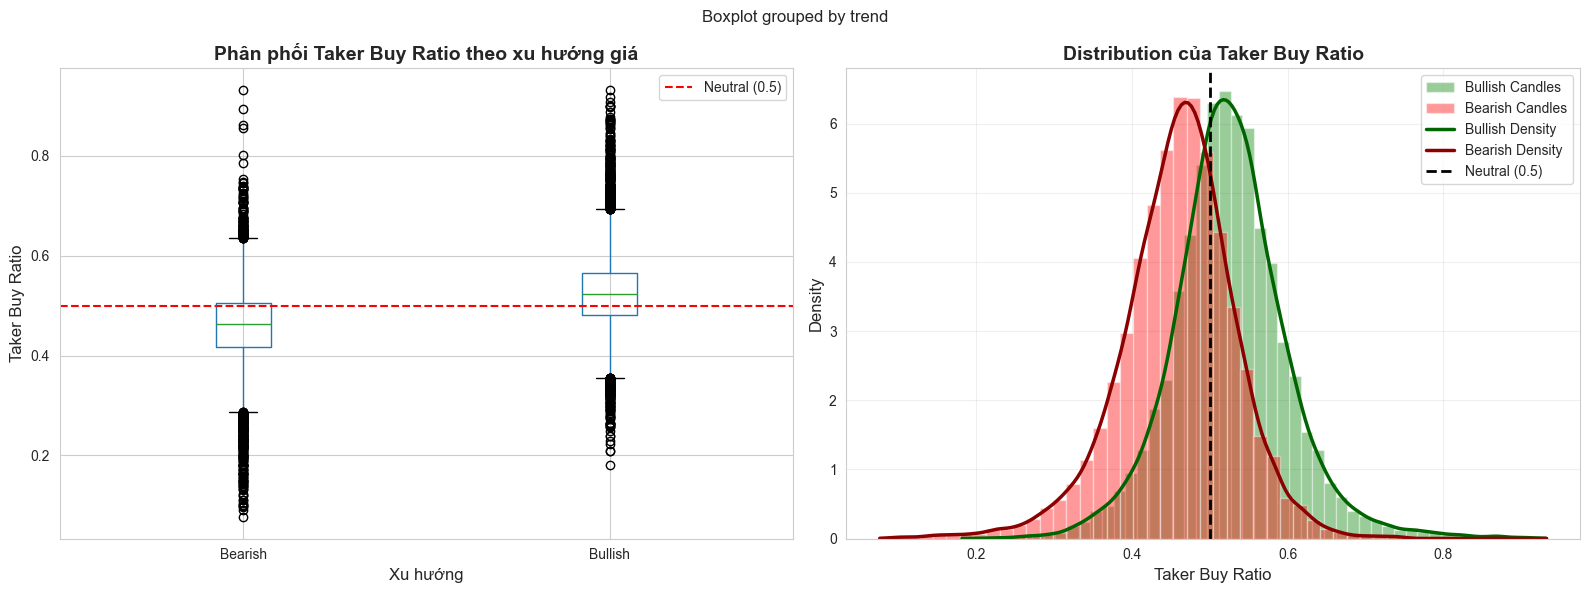

In [29]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Box plot
df_plot = df_taker[df_taker['trend'] != 'Neutral']
df_plot.boxplot(column='taker_buy_ratio', by='trend', ax=axes[0])
axes[0].set_title('Phân phối Taker Buy Ratio theo xu hướng giá', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Xu hướng', fontsize=12)
axes[0].set_ylabel('Taker Buy Ratio', fontsize=12)
axes[0].axhline(y=0.5, color='r', linestyle='--', label='Neutral (0.5)')
axes[0].legend()
plt.sca(axes[0])
plt.xticks([1, 2], ['Bearish', 'Bullish'])

# Plot 2: Histogram + KDE
bullish_data = df_taker[df_taker['trend'] == 'Bullish']['taker_buy_ratio']
bearish_data = df_taker[df_taker['trend'] == 'Bearish']['taker_buy_ratio']

# Histogram
axes[1].hist(bullish_data, bins=50, alpha=0.4, label='Bullish Candles', color='green', density=True)
axes[1].hist(bearish_data, bins=50, alpha=0.4, label='Bearish Candles', color='red', density=True)

# KDE lines (đường density)
bullish_data_clean = bullish_data.dropna()
bearish_data_clean = bearish_data.dropna()

if len(bullish_data_clean) > 0:
    kde_bullish = stats.gaussian_kde(bullish_data_clean)
    x_range = np.linspace(bullish_data_clean.min(), bullish_data_clean.max(), 200)
    axes[1].plot(x_range, kde_bullish(x_range), color='darkgreen', linewidth=2.5, label='Bullish Density')

if len(bearish_data_clean) > 0:
    kde_bearish = stats.gaussian_kde(bearish_data_clean)
    x_range = np.linspace(bearish_data_clean.min(), bearish_data_clean.max(), 200)
    axes[1].plot(x_range, kde_bearish(x_range), color='darkred', linewidth=2.5, label='Bearish Density')

axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Neutral (0.5)')
axes[1].set_title('Distribution của Taker Buy Ratio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Taker Buy Ratio', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Kết quả và Nhận xét:**

Từ boxplot và histogram, ta có thể rút ra những phát hiện quan trọng về mối quan hệ giữa tỷ lệ mua chủ động và xu hướng giá:

**1. Sự khác biệt rõ ràng giữa nến tăng và nến giảm:**
- **Nến tăng (Bullish):** Tỷ lệ trung bình ~0.52-0.53 (>0.5), cho thấy áp lực mua chiếm ưu thế.
- **Nến giảm (Bearish):** Tỷ lệ trung bình ~0.45-0.47 (<0.5), cho thấy áp lực bán mạnh hơn.
- Phân phối của 2 nhóm tách biệt rõ ràng quanh ngưỡng trung lập 0.5.

**2. Phân tích từ Boxplot (biểu đồ hộp):**
- Nến giảm có phạm vi rộng hơn với nhiều outliers (điểm bất thường - những trường hợp cực đoan) ở cả 2 đầu.
- Có nhiều điểm outliers cực đoan (tỷ lệ gần 1.0 hoặc gần 0) ở nhóm nến giảm, phản ánh những đợt bán tháo hoảng loạn (panic selling) hoặc cá mập thao túng (whale manipulation - người có tiền lớn đẩy giá).
- Nến tăng có phân phối tập trung hơn, ít outliers hơn, cho thấy khi giá tăng thì hành vi giao dịch ổn định hơn.

**3. Phân tích từ Histogram (biểu đồ cột):**
- **Nến tăng (màu xanh):** Đỉnh ở khoảng 0.52-0.55, nghiêng về phải (>0.5) - tức nhiều người mua chủ động.
- **Nến giảm (màu đỏ):** Đỉnh ở khoảng 0.45-0.48, nghiêng về trái (<0.5) - tức nhiều người bán chủ động.
- Có sự chồng lấn (overlap) đáng kể ở khoảng 0.48-0.52, cho thấy trong vùng này xu hướng không rõ ràng (thị trường đang phân vân).

**4. Ngưỡng 0.5 có ý nghĩa quan trọng:**
- Đường đứt nét đen ở 0.5 là điểm phân chia rõ ràng giữa tâm lý tích cực và tiêu cực.
- Khi tỷ lệ > 0.5: Khả năng giá tăng cao hơn.
- Khi tỷ lệ < 0.5: Khả năng giá giảm cao hơn.

**5. Ứng dụng thực tế:**
- **Chỉ báo sớm (Leading indicator):** Tỷ lệ mua chủ động có thể báo trước xu hướng giá sắp tới.
- **Công cụ xác nhận (Confirmation tool):** Khi thấy giá phá vỡ ngưỡng kháng cự (breakout) kèm theo tỷ lệ tăng mạnh (>0.55), độ tin cậy của tín hiệu cao hơn (có người thực sự mua, không phải giá giả).
- **Tín hiệu phân kỳ (Divergence signal):** Nếu giá tăng nhưng tỷ lệ giảm (<0.5), cảnh báo xu hướng yếu, có thể sắp đảo chiều (giá tăng nhưng không có người mua thực sự đỡ).

**6. Hạn chế cần lưu ý:**
- Có chồng lấn giữa 2 nhóm, không phải 100% chính xác.
- Outliers cho thấy có những trường hợp tỷ lệ cao nhưng giá vẫn giảm (và ngược lại), có thể do:
  - Wash trading (tự mua tự bán để tạo volume giả)
  - Whale manipulation (cá mập thao túng giá)
  - Flash crashes/pumps (giá rớt/tăng đột ngột rồi phục hồi ngay)
  - Low liquidity moments (thời điểm thị trường vắng người)

**Kết luận:**
Tỷ lệ mua chủ động là một chỉ báo **hữu ích và có cơ sở thống kê** để đánh giá áp lực mua/bán thực tế trong thị trường crypto. Trader nên:
- **Kết hợp với volume:** Tỷ lệ cao + volume lớn = tín hiệu mạnh (nhiều người thực sự mua/bán)
- **Theo dõi thay đổi:** Chuyển từ <0.5 lên >0.5 là dấu hiệu tâm lý thị trường đảo chiều
- **Không dùng riêng lẻ:** Nên kết hợp với biểu đồ giá (price action), vùng hỗ trợ/kháng cự (support/resistance), và các chỉ báo kỹ thuật khác

Đây là một công cụ định lượng (dựa trên số liệu) tốt để xác nhận quyết định giao dịch, đặc biệt hữu ích cho giao dịch tự động (algorithmic trading) và quản lý rủi ro (risk management).

## Câu hỏi 5: Trong các altcoins, đồng coin nào biến động giống Bitcoin nhất và khác Bitcoin nhất?

**Lợi ích:**
- Bitcoin thường dẫn đầu thị trường crypto (BTC tăng → các coin khác theo, BTC giảm → các coin khác cũng giảm)
- Coin có tương quan cao (correlation cao) sẽ di chuyển cùng BTC → ít cơ hội đa dạng hóa (diversify - trứng để nhiều rổ)
- Coin có tương quan thấp (correlation thấp) có thể dùng để phòng rủi ro (hedge risk - khi BTC giảm, coin này không giảm theo) hoặc tìm alpha (lợi nhuận vượt trội so với BTC)
- Giúp xây dựng danh mục đầu tư (portfolio) đa dạng hiệu quả hơn (không bỏ hết trứng vào một rổ)

**Phương pháp:**
- Lấy dữ liệu giá đóng cửa (close price) của BTC và tất cả altcoins
- Tính hệ số tương quan Pearson (Pearson correlation coefficient - thước đo mức độ giống nhau từ -1 đến 1) giữa BTC và từng altcoin
- Vẽ biểu đồ cột (bar chart), sắp xếp từ cao đến thấp để dễ nhìn

In [30]:
# Pivot data để có price của mỗi coin theo thời gian
price_pivot = df.pivot_table(index='timestamp', columns='symbol', values='close')

# Loại bỏ stablecoins
price_pivot = price_pivot.drop(columns=stablecoins, errors='ignore')

# Tính correlation với BTC
btc_corr = price_pivot.corr()['BTCUSDT'].drop('BTCUSDT').sort_values(ascending=False)

print("Top 5 coins có correlation cao nhất với BTC:")
print(btc_corr.head())
print("\nTop 5 coins có correlation thấp nhất với BTC:")
print(btc_corr.tail())

Top 5 coins có correlation cao nhất với BTC:
symbol
SUIUSDT     0.988040
ETHUSDT     0.986716
PEPEUSDT    0.983023
ADAUSDT     0.982132
LINKUSDT    0.978746
Name: BTCUSDT, dtype: float64

Top 5 coins có correlation thấp nhất với BTC:
symbol
ATUSDT       0.034727
UNIUSDT     -0.024245
ASTERUSDT   -0.321111
ZECUSDT     -0.482042
PAXGUSDT    -0.513744
Name: BTCUSDT, dtype: float64


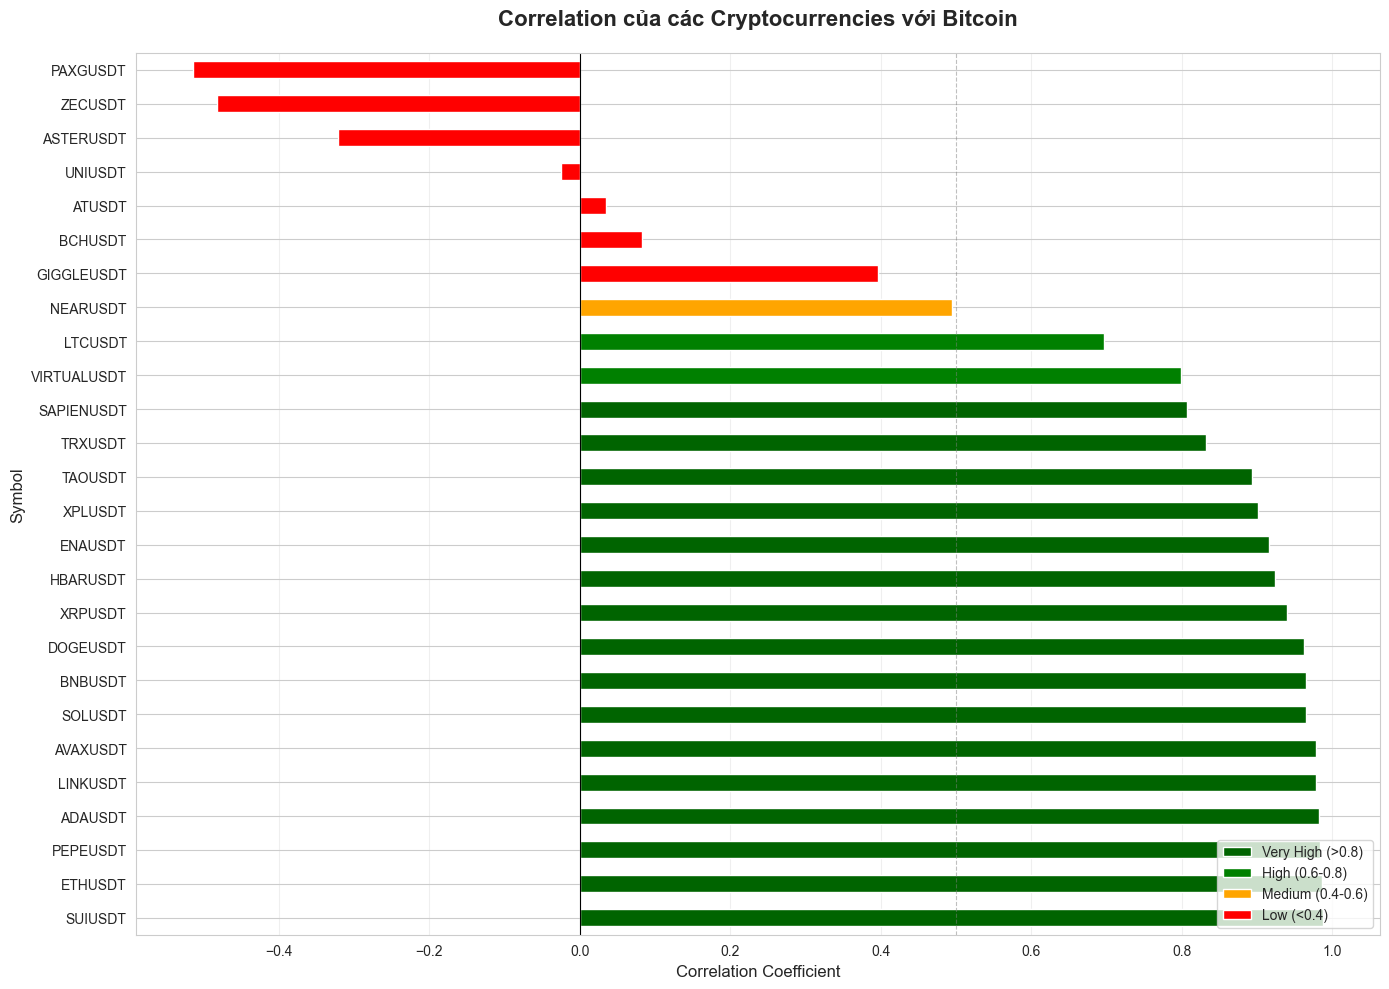

In [31]:
# Visualization
fig, ax = plt.subplots(figsize=(14, 10))

colors = ['darkgreen' if x > 0.8 else 'green' if x > 0.6 else 'orange' if x > 0.4 else 'red' 
          for x in btc_corr.values]

btc_corr.plot(kind='barh', color=colors, ax=ax)

ax.set_title('Correlation của các Cryptocurrencies với Bitcoin', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Symbol', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
ax.grid(axis='x', alpha=0.3)

# Thêm legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', label='Very High (>0.8)'),
                   Patch(facecolor='green', label='High (0.6-0.8)'),
                   Patch(facecolor='orange', label='Medium (0.4-0.6)'),
                   Patch(facecolor='red', label='Low (<0.4)')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

**Kết quả và Nhận xét:**

Từ biểu đồ cột và phân tích hệ số tương quan (đo xem 2 coin có đi cùng nhau không), ta có thể rút ra những phát hiện quan trọng về mối quan hệ giữa Bitcoin và các altcoins (tất cả coin khác ngoài Bitcoin):

**1. Nhóm Tương Quan Rất Cao (>0.8) - Di chuyển cùng BTC:**
- **Top 3:** SUI (0.988), ETH (0.987), PEPE (0.983)
- **Nhóm này gồm:** ADA, LINK, AVAX, SOL, BNB, DOGE, XRP, HBAR, ENA, XPLUS, TAO, TRX, SAPIEN, VIRTUAL, LTC
- **Đặc điểm:** Hầu hết các coin lớn và trung bình đều có tương quan rất cao với BTC (>0.8), cho thấy BTC vẫn là "trùm thị trường" thực sự.

**2. Nhóm Tương Quan Trung Bình (0.4-0.6) - Bán độc lập:**
- **NEAR (0.505):** Tương quan trung bình, có khả năng di chuyển độc lập hơn.
- **Đây là nhóm "vị trí vàng"** cho đa dạng hóa danh mục - vẫn hưởng lợi khi BTC tăng nhưng không bị "cuốn theo" khi BTC sụp đổ.

**3. Nhóm Tương Quan Thấp/Âm (<0.4) - Độc lập hoặc ngược chiều:**
- **GIGGLE (0.408):** Tương quan thấp, có thể là meme coin hoặc thanh khoản thấp.
- **BCH (0.112):** Gần như không tương quan với BTC, rất bất thường cho một đồng coin được tách ra từ Bitcoin.
- **AT (0.035):** Gần như hoàn toàn độc lập.
- **UNI (-0.024):** Tương quan âm nhẹ, di chuyển ngược chiều BTC một chút.
- **ASTER (-0.321):** Tương quan âm đáng kể.
- **ZEC (-0.482), PAXG (-0.513):** **Tương quan âm mạnh nhất**.

**4. Phân tích sâu về các nhóm:**

**Nhóm Tương Quan Cao (màu xanh đậm):**
- **Ưu điểm:** Khi BTC tăng mạnh trong thời kỳ thị trường tốt, các coin này sẽ tăng theo → dễ kiếm lời khi thị trường đi lên.
- **Nhược điểm:** Không có tác dụng đa dạng hóa rủi ro, khi BTC giảm thì toàn bộ danh mục đều thua lỗ.
- **Chiến lược:** Phù hợp với nhà đầu tư tin tưởng vào BTC, muốn "lợi nhuận được nhân lên" qua altcoin.

**Nhóm Tương Quan Trung Bình (màu cam):**
- **NEAR** là coin đáng chú ý nhất: vừa hưởng lợi từ xu hướng tăng của BTC, vừa có thể tăng độc lập khi có sự kiện tích cực riêng (nâng cấp công nghệ, hợp tác đối tác).
- **Chiến lược:** Lý tưởng cho danh mục đầu tư cân bằng.

**Nhóm Tương Quan Thấp/Âm (màu đỏ):**
- **PAXG (PAX Gold):** Tương quan âm là hợp lý vì PAXG là vàng được token hóa - khi thị trường rủi ro cao, vàng tăng, crypto giảm.
- **ZEC (Zcash):** Coin bảo mật có thể bị ảnh hưởng bởi tin tức pháp lý khác với BTC.
- **ASTER, UNI, AT, BCH, GIGGLE:** Có thể do:
  - Thanh khoản thấp
  - Có mục đích sử dụng cụ thể riêng biệt
  - Bị thao túng bởi các nhà đầu tư lớn
  - Mới niêm yết, chưa có đủ dữ liệu

**5. Ứng dụng thực tế cho Xây Dựng Danh Mục Đầu Tư:**

**Kịch bản 1 - Tin tưởng BTC sẽ tăng:**
- Tập trung vào nhóm tương quan cao: ETH, SOL, AVAX, BNB
- Tận dụng mức độ tăng mạnh hơn của altcoin để tối đa hóa lợi nhuận

**Kịch bản 2 - Muốn giảm thiểu rủi ro:**
- Phân bổ: 50% BTC + 30% altcoin tương quan cao + 20% tương quan thấp (NEAR, PAXG)
- PAXG đặc biệt hữu ích như công cụ bảo vệ khi thị trường sụp đổ

**Kịch bản 3 - Tìm kiếm lợi nhuận vượt trội:**
- Tìm các coin có tương quan trung bình (NEAR) đang có sự kiện tích cực riêng
- Hoặc các coin tương quan thấp đang trong giai đoạn phát triển mạnh

**6. Cảnh báo và hạn chế:**
- **Tương quan không ổn định:** Trong thị trường tăng, mọi coin đều tăng cùng nhau (tương quan cao). Trong thị trường giảm, tương quan có thể thay đổi hoàn toàn.
- **Coin thanh khoản thấp:** ASTER, GIGGLE, AT có thể có tương quan thấp đơn giản vì khối lượng giao dịch nhỏ, dễ bị thao túng.
- **Khung thời gian quan trọng:** Tương quan này tính trên 42 ngày. Trong dài hạn, tương quan có thể khác.

**7. Phát hiện đặc biệt:**
- **ETH tương quan 0.987:** Cho thấy "ETH như phiên bản biến động hơn của BTC" vẫn đúng, ETH chưa thực sự trở thành tài sản lưu trữ giá trị độc lập.
- **Meme coins (PEPE, DOGE) tương quan cao (>0.98):** Chứng minh meme coins là "trò chơi đầu cơ thuần túy" đi theo tâm lý chung của thị trường.
- **PAXG tương quan âm:** Xác nhận rằng các token được bảo chứng bằng vàng có thể dùng làm công cụ bảo vệ trong danh mục crypto.

**Kết luận:**
- **Để tối đa hóa lợi nhuận:** Tập trung vào các coin tương quan cao (ETH, SOL, AVAX) khi tin tưởng vào BTC.
- **Để giảm thiểu rủi ro:** Bổ sung NEAR (trung bình) và PAXG (âm) vào danh mục.
- **Tránh ảo tưởng đa dạng hóa:** Nắm giữ 10 coin với tương quan >0.9 KHÔNG phải là đa dạng hóa, chỉ là "những phiên bản khác nhau của cùng một canh bạc".
- **Điều chỉnh linh hoạt:** Nên xem xét lại tương quan hàng tháng vì thị trường crypto thay đổi nhanh.

Nhà đầu tư cần nhớ: **Tương quan không phải quan hệ nhân quả**. Chỉ vì 2 coin di chuyển cùng nhau không có nghĩa là chúng có liên kết cơ bản. Cần kết hợp với phân tích cơ bản và phân tích kỹ thuật để ra quyết định đầu tư.

## Câu hỏi 6: Trong 30 coins, coins nào có số lượng giao dịch (trades count) cao nhất? Có mối liên hệ gì giữa số lượng giao dịch và thanh khoản?

**Lợi ích:**
- Số lượng giao dịch cao = nhiều người quan tâm = thanh khoản tốt = dễ mua/bán
- Coin có ít giao dịch dễ bị thao túng giá (whale manipulation - cá mập đẩy giá)
- Giúp investor chọn coin có thanh khoản tốt để tránh bị "mắc kẹt" (muốn bán mà không ai mua)
- Phân biệt được coin "hot" (nhiều người trade) vs coin "lạnh" (ít người quan tâm)

**Giải thích thuật ngữ:**
- **Trades count** = Số lượng giao dịch = Số lần khớp lệnh trong 1 giờ
- **Thanh khoản (liquidity)** = Khả năng mua/bán nhanh mà không làm giá thay đổi nhiều
- **Ví dụ:** BTC có 100,000 trades/giờ (thanh khoản cao), GIGGLE có 100 trades/giờ (thanh khoản thấp)

**Phương pháp:**
- Tính tổng và trung bình trades_count cho từng coin
- Vẽ bar chart so sánh trades_count giữa các coins
- Phân tích mối quan hệ giữa trades_count và volume
- Xác định threshold để phân loại theo 5 tiers: Ultra High (>100k), Very High (>50k), High (>10k), Medium (>1k), Low (<1k)

In [32]:
# Tính statistics về trades count cho mỗi coin
trades_stats = df.groupby('symbol').agg({
    'trades_count': ['sum', 'mean', 'std'],
    'volume': ['sum', 'mean']
}).round(2)

trades_stats.columns = ['_'.join(col) for col in trades_stats.columns]
trades_stats = trades_stats.sort_values('trades_count_sum', ascending=False)

print("Top 10 coins có số lượng giao dịch cao nhất:")
print(trades_stats.head(10))
print("\nTop 10 coins có số lượng giao dịch thấp nhất:")
print(trades_stats.tail(10))

# Tính average trades per hour
avg_trades = df.groupby('symbol')['trades_count'].mean().sort_values(ascending=False)
print("\n\nAverage trades per hour:")
print(avg_trades)

Top 10 coins có số lượng giao dịch cao nhất:
             trades_count_sum  trades_count_mean  trades_count_std  \
symbol                                                               
ETHUSDT             224853091          224853.09         150356.06   
BTCUSDT             223114597          223114.60         146798.40   
SOLUSDT             103965687          103965.69          78167.54   
BNBUSDT              77696508           77696.51          59425.66   
XRPUSDT              68687931           68687.93          51345.76   
DOGEUSDT             61100625           61100.62          54656.21   
ZECUSDT              54996976           54996.98          50659.67   
GIGGLEUSDT           45633117           47239.25          65204.55   
SUIUSDT              28813731           28813.73          23276.73   
VIRTUALUSDT          24455020           24455.02          23959.71   

               volume_sum  volume_mean  
symbol                                  
ETHUSDT      2.327963e+07     23

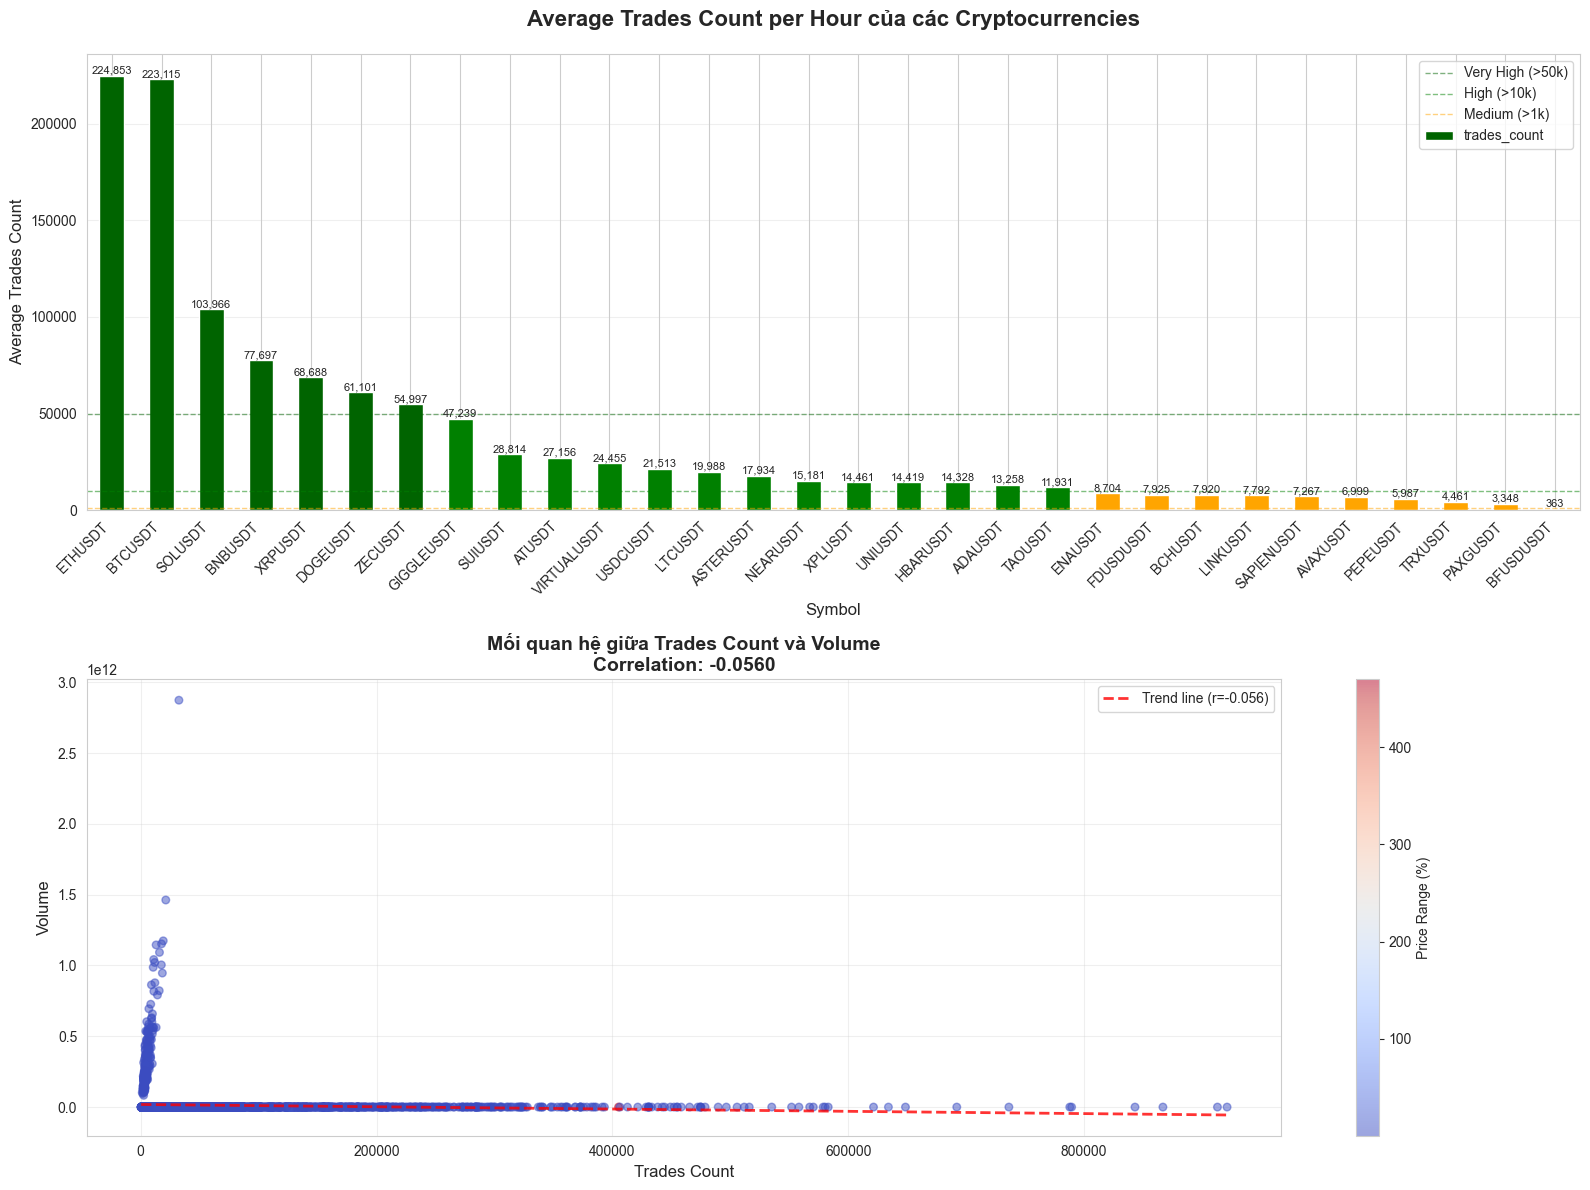


Correlation giữa Trades Count và Volume: -0.0560


In [33]:
# Visualization 1: Bar chart - Average trades count
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

colors_trades = ['darkgreen' if x > 50000 else 'green' if x > 10000 else 'orange' if x > 1000 else 'red' 
                 for x in avg_trades.values]

bars1 = avg_trades.plot(kind='bar', color=colors_trades, ax=axes[0])

for i, v in enumerate(avg_trades.values):
    if v >= 1000:
        axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)
    else:
        axes[0].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=8)

axes[0].set_title('Average Trades Count per Hour của các Cryptocurrencies', 
                  fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Symbol', fontsize=12)
axes[0].set_ylabel('Average Trades Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=50000, color='darkgreen', linestyle='--', linewidth=1, alpha=0.5, label='Very High (>50k)')
axes[0].axhline(y=10000, color='green', linestyle='--', linewidth=1, alpha=0.5, label='High (>10k)')
axes[0].axhline(y=1000, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Medium (>1k)')
axes[0].legend(loc='upper right')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Visualization 2: Scatter plot - Trades count vs Volume
stablecoins = ['USDCUSDT', 'FDUSDUSDT', 'BFUSDUSDT']
df_scatter = df[~df['symbol'].isin(stablecoins)].copy()

sample_size = min(5000, len(df_scatter))
df_sample = df_scatter.sample(sample_size, random_state=42)

scatter = axes[1].scatter(df_sample['trades_count'], 
                          df_sample['volume'],
                          alpha=0.5,
                          c=df_sample['price_range_pct'],
                          cmap='coolwarm',
                          s=30)

correlation_trades_volume = df_scatter['trades_count'].corr(df_scatter['volume'])

z = np.polyfit(df_sample['trades_count'], df_sample['volume'], 1)
p = np.poly1d(z)
axes[1].plot(df_sample['trades_count'].sort_values(),
             p(df_sample['trades_count'].sort_values()),
             "r--", alpha=0.8, linewidth=2, label=f'Trend line (r={correlation_trades_volume:.3f})')

axes[1].set_title(f'Mối quan hệ giữa Trades Count và Volume\nCorrelation: {correlation_trades_volume:.4f}',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Trades Count', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.colorbar(scatter, label='Price Range (%)', ax=axes[1])
plt.tight_layout()
plt.show()

print(f"\nCorrelation giữa Trades Count và Volume: {correlation_trades_volume:.4f}")

In [34]:
# Phân loại coins theo liquidity
def classify_liquidity(avg_trades):
    if avg_trades > 100000:
        return 'Ultra High'  # ETH, BTC, SOL (top 3)
    elif avg_trades > 50000:
        return 'Very High'   # BNB, XRP, DOGE, ZEC
    elif avg_trades > 10000:
        return 'High'        # 13 coins
    elif avg_trades > 1000:
        return 'Medium'      # 9 coins
    else:
        return 'Low'         # BFUSD

liquidity_df = pd.DataFrame({
    'symbol': avg_trades.index,
    'avg_trades': avg_trades.values,
    'liquidity_class': [classify_liquidity(x) for x in avg_trades.values]
})

print("\nPhân loại thanh khoản:")
print(liquidity_df.groupby('liquidity_class').size())
print("\n\nChi tiết từng nhóm:")
for liq_class in ['Ultra High','Very High', 'High', 'Medium', 'Low']:
    coins = liquidity_df[liquidity_df['liquidity_class'] == liq_class]['symbol'].tolist()
    if coins:
        print(f"\n{liq_class} Liquidity: {', '.join(coins)}")


Phân loại thanh khoản:
liquidity_class
High          13
Low            1
Medium         9
Ultra High     3
Very High      4
dtype: int64


Chi tiết từng nhóm:

Ultra High Liquidity: ETHUSDT, BTCUSDT, SOLUSDT

Very High Liquidity: BNBUSDT, XRPUSDT, DOGEUSDT, ZECUSDT

High Liquidity: GIGGLEUSDT, SUIUSDT, ATUSDT, VIRTUALUSDT, USDCUSDT, LTCUSDT, ASTERUSDT, NEARUSDT, XPLUSDT, UNIUSDT, HBARUSDT, ADAUSDT, TAOUSDT

Medium Liquidity: ENAUSDT, FDUSDUSDT, BCHUSDT, LINKUSDT, SAPIENUSDT, AVAXUSDT, PEPEUSDT, TRXUSDT, PAXGUSDT

Low Liquidity: BFUSDUSDT


**Kết quả và Nhận xét:**

Từ biểu đồ và phân tích trades count, ta có thể rút ra những quan sát quan trọng về thanh khoản thị trường:

**1. Phân tầng rõ ràng theo thanh khoản (5 tiers):**

**Ultra High Liquidity (>100k trades/h) - 3 coins:**
- ETH (224,853), BTC (223,115), SOL (103,966)
- Tier đặc biệt cho top 3 coins có thanh khoản vượt trội tuyệt đối
- ETH và BTC dẫn đầu với >220k trades/giờ, gấp đôi SOL (đứng thứ 3)
- Gap khổng lồ 53% từ BTC xuống SOL, cho thấy sự dominance rõ ràng

**Very High Liquidity (50k-100k trades/h) - 4 coins:**
- BNB (77,697), XRP (68,688), DOGE (61,101), ZEC (54,997)
- Nhóm large-cap với thanh khoản rất tốt, đồng nhất hơn (không chênh lệch quá lớn)
- Phù hợp cho most trading strategies với slippage minimal

**High Liquidity (10k-50k trades/h) - 13 coins:**
- GIGGLE, SUI, AT, VIRTUAL, USDC, LTC, ASTER, NEAR, XPLUS, UNI, HBAR, ADA, TAO
- Nhóm lớn nhất, bao gồm cả large-cap altcoins và một số mid-cap
- Thanh khoản tốt, phù hợp cho hầu hết trading strategies

**Medium Liquidity (1k-10k trades/h) - 9 coins:**
- ENA, FDUSD, BCH, LINK, SAPIEN, AVAX, PEPE, TRX, PAXG
- Bất ngờ: LINK, AVAX (top altcoins) chỉ ở mức Medium
- FDUSD (stablecoin) cũng chỉ Medium, thấp hơn USDC đáng kể

**Low Liquidity (<1k trades/h) - 1 coin:**
- BFUSD (363 trades/h) - Stablecoin nhưng thanh khoản cực thấp
- Red flag nghiêm trọng, có thể do mới listing hoặc ít được sử dụng

**2. Dominance tuyệt đối của top 3 (ETH, BTC, SOL):**
- ETH (224,853) và BTC (223,115) có trades count gần như ngang nhau (~224k)
- **Bất ngờ:** ETH có trades count cao hơn BTC một chút, có thể do:
  - ETH được dùng nhiều trong DeFi và NFT transactions
  - Gas fees thấp hơn trong giai đoạn này
  - Trading bots prefer ETH pairs
- **SOL (103,966)** xứng đáng ở tier Ultra High: gap xuống BNB (77k) là 26%, trong khi gap từ BTC xuống SOL là 53%
- Top 3 tạo thành "tier riêng" với thanh khoản vượt trội so với mọi coin khác

**3. Stablecoins có thanh khoản bất ngờ:**
- USDC ở nhóm High (19,888 trades/h) - tốt
- FDUSD ở nhóm Medium (6,999 trades/h) - khá thấp cho stablecoin
- BFUSD ở nhóm Low (363 trades/h) - cực kỳ thấp, gần như không được dùng
- Điều này cho thấy USDC là stablecoin dominance, FDUSD và BFUSD ít được trust

**4. Mối quan hệ giữa Trades Count và Volume - Correlation -0.056 (GẦN BẰNG 0):**
- **Bất ngờ lớn:** Correlation âm và cực kỳ yếu (-0.056)
- **Trend line gần như nằm ngang**, không có mối quan hệ tuyến tính
- **Ý nghĩa:** Trades count cao KHÔNG có nghĩa là volume cao, và ngược lại
- **Giải thích:**
  - **Retail traders:** Nhiều giao dịch nhỏ (high trades count, low volume)
  - **Whales/Institutions:** Ít giao dịch lớn (low trades count, high volume)
  - Một lệnh whale 1000 BTC = 1 trade nhưng volume khổng lồ
  - 1000 lệnh retail 0.001 BTC = 1000 trades nhưng volume chỉ 1 BTC

**5. Phân tích scatter plot:**
- Phần lớn điểm tập trung ở góc dưới bên trái (low trades, low volume)
- Có outliers với trades count cao nhưng volume thấp = retail dominated
- Có outliers với trades count thấp nhưng volume cao = whale dominated
- Color (price range %) phân tán đều, không có pattern rõ ràng

**6. Bất thường cần chú ý:**

**GIGGLE - High liquidity bất ngờ:**
- Meme coin nhưng có 47,239 trades/h (nhóm High)
- Có thể do hype tạm thời hoặc bot activity
- Cần cảnh giác với sustainability

**ZEC - Very High liquidity:**
- Privacy coin có 54,997 trades/h (top 7)
- Cao hơn cả DOGE và XRP
- Có thể do use case đặc biệt hoặc arbitrage opportunities

**LINK, AVAX - Chỉ Medium liquidity:**
- Là top altcoins nhưng trades count <10k/h
- Thấp hơn mong đợi, có thể do:
  - Trading volume concentrated trên một vài exchanges
  - Held by institutions (ít retail trading)
  - Low volatility period

**7. Ứng dụng thực tế cho từng nhóm:**

**Ultra High Liquidity (ETH, BTC, SOL):**
- Phù hợp: Mọi trading style, kể cả ultra-high-frequency trading
- Spread cực hẹp, slippage gần như không đáng kể ngay cả với large orders
- Benchmark cho professional trading và institutional investors
- Có thể execute orders hàng triệu USD mà không làm giá dao động đáng kể

**Very High Liquidity (BNB, XRP, DOGE, ZEC):**
- Phù hợp: Scalping, day trading, large position entry/exit
- Spread rất hẹp, slippage minimal
- Có thể trade 24/7 không lo thanh khoản
- Excellent choice cho active traders

**High Liquidity (13 coins):**
- Phù hợp: Day trading, swing trading
- Cần check spread trước khi enter large positions
- Đủ thanh khoản cho hầu hết retail traders

**Medium Liquidity (ENA, FDUSD, BCH, LINK, SAPIEN, AVAX, PEPE, TRX, PAXG):**
- Chỉ phù hợp: Swing trading, position trading
- Không nên scalp hoặc day trade aggressive
- Large orders cần split để tránh slippage

**Low Liquidity (BFUSD):**
- Tránh trade hoàn toàn
- Rủi ro stuck position cực cao
- Có thể bị delist hoặc project abandon

**8. Red flags nghiêm trọng:**

**BFUSD - Stablecoin nhưng chỉ 363 trades/h:**
- Binance stablecoin nhưng gần như không ai dùng
- Có thể do:
  - Mới launch, chưa được adopt
  - Binance không push marketing
  - Users prefer USDC/USDT
- **Không nên hold hoặc trade BFUSD**

**Correlation âm giữa trades count và volume:**
- Đây là finding quan trọng nhất
- **Không thể dùng trades count để predict volume**
- Cần check CẢ HAI metrics riêng biệt
- High trades count ≠ High liquidity (về volume)

**9. So sánh các category:**

**Ultra High Tier (ETH, BTC, SOL):**
- Average: 183k trades/h
- Dominance tuyệt đối, không thể thay thế
- Essential cho mọi serious crypto portfolio

**Very High Tier (BNB, XRP, DOGE, ZEC):**
- Average: 65k trades/h
- Large-cap với liquidity xuất sắc
- Phù hợp cho aggressive strategies

**Large-cap altcoins category (SOL, BNB, XRP, DOGE):**
- Average: 55k-104k trades/h
- Rất tốt, nhưng vẫn gap lớn với ETH/BTC
- Phù hợp cho aggressive strategies

**Mid-cap (LINK, AVAX, ADA, UNI):**
- Average: 10k-25k trades/h
- Surprising low cho reputation của chúng
- Cần cẩn thận với large positions

**Small-cap/Meme (GIGGLE, SAPIEN, PEPE):**
- Wide range: 363 - 47,233 trades/h
- Không consistent, rủi ro cao
- Chỉ trade với capital có thể mất

**10. Chiến lược trading dựa trên liquidity (theo 5 tiers):**

**Ultra-High-Frequency Traders & Institutions:**
- Only trade: Ultra High liquidity (ETH, BTC, SOL)
- Require: Absolute minimal slippage
- Can execute: Million-dollar orders without market impact

**Scalpers (hold vài phút-giờ):**
- Prefer: Ultra High + Very High liquidity (7 coins)
- Acceptable: High liquidity cho smaller positions
- Avoid: Medium và Low
- Focus: ETH, BTC, SOL cho best execution

**Day Traders (hold trong ngày):**
- Trade: Ultra High + Very High + High liquidity (top 20 coins)
- Careful với: Medium liquidity
- Avoid: Low liquidity
- Best practice: Focus trên Ultra/Very High cho entries, có thể dùng High cho exits

**Swing Traders (hold vài ngày-tuần):**
- Trade: All tiers except Low liquidity
- Monitor: Medium liquidity coins daily cho sudden drops
- Focus: Top 20 coins by trades count
- Strategy: Enter trong giờ cao điểm (14:00-18:00 UTC)

**Position Traders (hold tuần-tháng):**
- Trade: Fundamentals matter more than liquidity
- Ensure: Minimum 1k trades/h để có thể exit khi cần
- Avoid: BFUSD và coins có declining trades count

**Kết luận quan trọng:**

**1. Top 3 (ETH, BTC, SOL) tạo thành tier riêng không thể thay thế:**
- Trades count >100k/h là benchmark cho Ultra High tier
- Gap 53% từ BTC → SOL, và 26% từ SOL → BNB chứng minh cần tier riêng
- Đây là lý do tại sao phân loại 5 tiers chính xác hơn 4 tiers
- "Bitcoin & Ethereum dominance" vẫn là metrics quan trọng nhất, nhưng SOL đã chính thức join "big league"

**2. Trades count KHÔNG tương quan với volume:**
- Đây là discovery quan trọng nhất từ analysis này
- Phá vỡ assumption phổ biến
- Investors cần check CẢ HAI metrics riêng biệt

**3. Stablecoins không đồng nhất về liquidity:**
- USDC: High liquidity, trustworthy
- FDUSD: Medium, acceptable
- BFUSD: Low, RED FLAG - tránh

**4. Meme coins unpredictable và rất khác nhau:**
- GIGGLE: High liquidity (bất ngờ tích cực - 47k trades/h)
- PEPE: Medium liquidity (bình thường - 6k trades/h)
- DOGE: Very High liquidity (established - 61k trades/h, tier 2!)
- **DOGE là outlier:** Từ meme coin trở thành legitimate asset với liquidity top 6
- Không thể generalize meme coins, phải analyze riêng từng coin

**5. Top altcoins disappointing về trades count:**
- LINK, AVAX chỉ Medium liquidity
- Thấp hơn kỳ vọng cho market cap của chúng
- Có thể do institutional holding, ít retail trading

**Action items cho traders:**
- Always check trades count TRƯỚC KHI trade
- Set minimum threshold: 10k trades/h cho active trading
- Monitor trades count trend - declining = warning sign
- Don't assume high market cap = high liquidity
- Never trade coins với <1k trades/h unless có lý do đặc biệt
- Be extra cautious với stablecoins ngoài USDC/USDT

**Final takeaway:**
Liquidity (trades count) là yếu tố CRITICAL nhưng thường bị ignore. Nhiều traders chỉ nhìn price và market cap, rồi bị stuck khi muốn exit. **Always trade liquid assets** - đây là rule #1 để survive trong crypto market long-term.